In [1]:
from PIL import Image, ImageDraw, ImageFont
import json

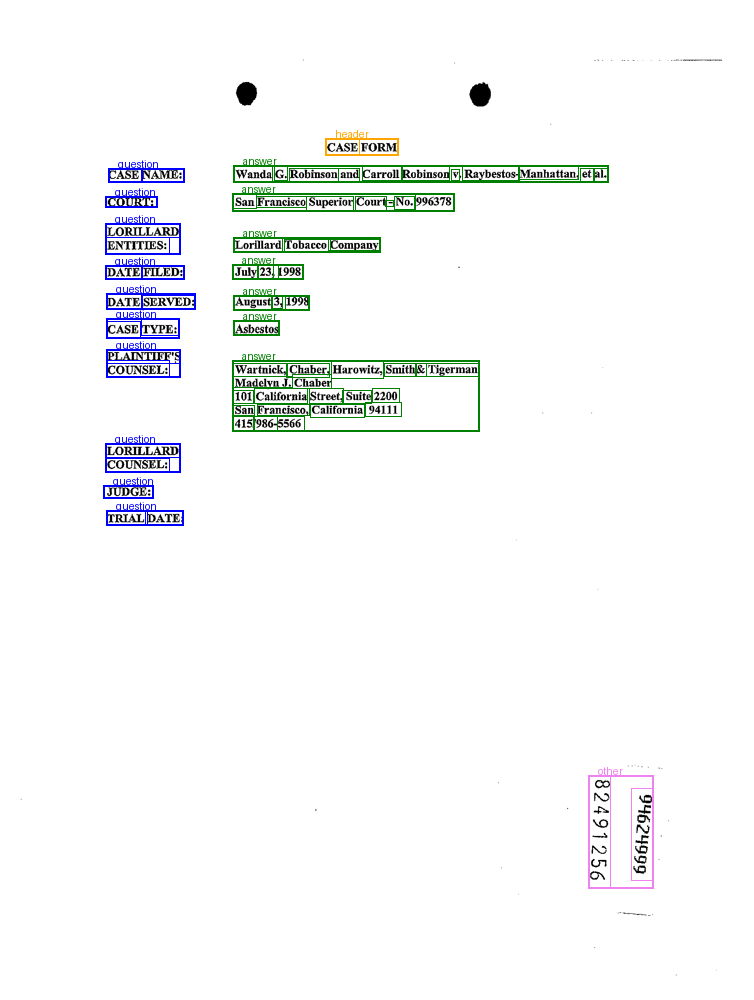

In [51]:
image = Image.open(r"D:\LLM\archive\dataset\testing_data\images\82491256.png")
image = image.convert("RGB")

with open(r"D:\LLM\archive\dataset\testing_data\annotations\82491256.json") as f:
  data = json.load(f)

draw = ImageDraw.Draw(image, "RGBA")

font = ImageFont.load_default()

label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for annotation in data['form']:
  label = annotation['label']
  general_box = annotation['box']
  draw.rectangle(general_box, outline=label2color[label], width=2)
  draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
  words = annotation['words']
  for word in words:
    box = word['box']
    draw.rectangle(box, outline=label2color[label], width=1)

image

In [2]:
lable_json_path = "project-1-at-2024-06-17-16-27-206122b8.json"

label_json = json.loads(open(lable_json_path).read())

In [3]:
file1_json = label_json[0]

In [4]:
result = file1_json['annotations'][0]['result']

In [5]:

updated_result = []
str_num_dct = {}
count = 0
for ann in result:
    if ann["type"]=="relation":
        if ann["from_id"] in str_num_dct:
            ann["from_id"] = str_num_dct[ann["from_id"]]
        else:
            ann["from_id"] = count
            str_num_dct[ann["from_id"]] = count
            count=count+1

        if ann["to_id"] in str_num_dct:
            ann["to_id"] = str_num_dct[ann["to_id"]]
        else:
            ann["to_id"] = count
            str_num_dct[ann["to_id"]] = count
            count=count+1
    else:
        id = ann["id"]
        if id not in str_num_dct:
            ann["id"]=count
            str_num_dct[id]=count
            count=count+1
            print("Count - ",count)
        else:
            ann["id"]=str_num_dct[id]
            
            
    updated_result.append(ann)

Count -  1
Count -  2
Count -  3
Count -  4
Count -  5
Count -  6
Count -  7
Count -  8
Count -  9
Count -  10
Count -  11
Count -  12
Count -  13
Count -  14
Count -  15
Count -  16
Count -  17
Count -  18
Count -  19
Count -  20
Count -  21
Count -  22
Count -  23
Count -  24
Count -  25
Count -  26
Count -  27
Count -  28
Count -  29
Count -  30
Count -  31
Count -  32
Count -  33
Count -  34


In [111]:
str_num_dct

{'c2e98fad-5': 0,
 '3219b700-c': 1,
 '28e5e048-e': 2,
 'da6a6bfa-9': 3,
 '672f9bf8-e': 4,
 'b8d6b37e-8': 5,
 '073c37ed-6': 6,
 'a1342c31-3': 7,
 '123ff8fc-a': 8,
 '1111e99b-b': 9,
 '5b9f7211-d': 10,
 'b7039740-4': 11,
 'b6d42dcc-e': 12,
 '4570a351-a': 13,
 '6c69eff6-a': 14,
 '54f9736e-f': 15,
 '7d3c3aea-2': 16,
 '00049cfd-e': 17,
 '7a948efe-6': 18,
 'c9c7f413-8': 19,
 '9ad95fbc-6': 20,
 '6e3b1d09-e': 21,
 '06ee5a7c-1': 22,
 'dc3accaf-c': 23,
 '38873ac4-4': 24,
 '4ce9c23e-3': 25,
 '1fe87f34-f': 26,
 '1a5c90a1-4': 27,
 'sSTAex0Y0z': 28,
 'B5tILrRctw': 29,
 'tWSKsRjx6k': 30,
 'tFm2gjHwOv': 31,
 '_hJHj3W5d-': 32,
 'Ygj1VgouWu': 33}

In [6]:
updated_result

[{'original_width': 754,
  'original_height': 1000,
  'image_rotation': 0,
  'value': {'x': 14.323607427055704,
   'y': 16.9,
   'width': 9.814323607427056,
   'height': 1.1,
   'rotation': 0},
  'id': 0,
  'from_name': 'bbox',
  'to_name': 'image',
  'type': 'rectangle',
  'origin': 'prediction-changed'},
 {'original_width': 754,
  'original_height': 1000,
  'image_rotation': 0,
  'value': {'x': 14.323607427055704,
   'y': 16.9,
   'width': 9.814323607427056,
   'height': 1.1,
   'rotation': 0,
   'text': ['CASENAME']},
  'id': 0,
  'from_name': 'transcription',
  'to_name': 'image',
  'type': 'textarea',
  'origin': 'prediction-changed',
  'score': 0.5},
 {'original_width': 754,
  'original_height': 1000,
  'image_rotation': 0,
  'value': {'x': 14.323607427055704,
   'y': 16.9,
   'width': 9.814323607427056,
   'height': 1.1,
   'rotation': 0,
   'labels': ['Question']},
  'id': 0,
  'from_name': 'label',
  'to_name': 'image',
  'type': 'labels',
  'origin': 'prediction-changed'},
 {

In [69]:
transcription = {}
labels = {}
relations = {}
for each in result:
    if each['type']=='textarea':
        id = each['id']
        transcription[id]=each
    if each['type']=="labels":
        id = each['id']
        labels[id] = each
    if each['type']=="relation":
        id = each["from_id"]
        relations[id] = each

In [ ]:
def modify_ids(transcription,labels,relations):
    

In [70]:
def convert_bounding_box(value):
    x, y, width, height = value['x'],value['y'],value['width'],value['height']
    x1 = x
    y1 = y
    x2 = x + width
    y2 = y + height

    return [x1, y1, x2, y2]
def get_relation(relations,id,typ):
    links = []
    for _,each in relations.items():
        if typ=="Question" and each["from_id"]==id:
            links.append([each["from_id"],each["to_id"]])
        if typ=="Answer" and each["to_id"]==id:
            links.append([each["from_id"],each["to_id"]])
    return links
def get_words(transcription,idx,coords):
    words = []
    ids = []
    for id_,ann in transcription.items():
        x1,y1,x2,y2 = convert_bounding_box(ann['value'])
        if x1>=coords[0] and x2<=coords[2] and y1>=coords[1] and y2<=coords[3] and id_!=idx:
            dct = {
                    "text": ann['value']['text'][0],
                    "box": [x1,y1,x2,y2]
                }
            words.append(dct)
            ids.append(ann['id'])
    return words,ids

In [93]:
output = []
completed_ids = []
sorted_transcription = {key:val for key,val in sorted(transcription.items(),key = lambda x: x[1]['value']['width']*x[1]['value']['height'],reverse=True)}
for idx,trsn in sorted_transcription.items():
    if idx not in completed_ids:
        text = trsn['value']['text']
        label_record = labels.get(idx)
        if label_record is None:
            label = 'Other'
        else:
            label = label_record['value']['labels'][0]
    
        dct = {}
        coords = convert_bounding_box(trsn['value'])
        dct['box'] = coords
        dct['text'] = text[0]
        dct['label'] = label
        dct['id'] = idx
    
        words,ids = get_words(transcription,idx,coords)
        completed_ids.extend(ids)
        if words==[]:
            words.append({"box":coords,"text":text})
        dct["words"] = words
    
        links = get_relation(relations,idx,label)
        dct["linking"] = links
        completed_ids.append(idx)
        output.append(dct)

In [94]:
{"form":output}

{'form': [{'box': [30.003564353620277,
    35.51880947520857,
    63.85789638118642,
    43.47119206848386],
   'text': 'Wartnick, Chaber, Harowitz, Smith & Tigerman Madelyn J. Chaber 101 California Street, Suite 2200 San Francisco, California 94111 415 986- 5566',
   'label': 'Answer',
   'id': '_hJHj3W5d-',
   'words': [{'text': 'Wartnick, Chaber, Harowitz, Smith& Tigerman',
     'box': [31.16710875331565, 36.2, 63.262599469496024, 37.6]},
    {'text': 'Madelyn J.Chaber',
     'box': [31.03448275862069, 37.6, 44.16445623342175, 39.0]},
    {'text': '101California Street, Suite 2200',
     'box': [31.03448275862069, 39, 52.91777188328912, 40.3]},
    {'text': 'San Francisco,California 94111',
     'box': [31.03448275862069, 40.3, 52.91777188328912, 41.699999999999996]},
    {'text': '415/986-5566',
     'box': [30.90185676392573, 41.7, 40.185676392572944, 43.1]}],
   'linking': [['tFm2gjHwOv', '_hJHj3W5d-']]},
  {'box': [127.27620727218398,
    38.319895952370445,
    154.552414544367

In [75]:
id = 'Ygj1VgouWu'
id2 = 'tFm2gjHwOv'

In [76]:
coords = convert_bounding_box(transcription[id]['value'])
coords2 = convert_bounding_box(transcription[id2]['value'])

In [74]:
coords

[13.150617452359198, 43.96207988288356, 24.73921572333376, 47.88918239808124]

In [77]:
coords2

[13.336816278510799, 34.43885628352921, 25.316041457495743, 38.562313924486766]

In [82]:
get_words(transcription,id2,coords2)

[{'text': "PLAINTIFF'S",
  'box': [13.925729442970823, 34.9, 24.13793103448276, 36.4]},
 {'text': 'COUNSEL:',
  'box': [14.190981432360743, 36.4, 22.413793103448278, 37.5]}]